In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as pl

In [2]:
df=pd.read_csv("vacunaciones.csv")#Leemos el fichero csv

In [3]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


# Ejercicio 1

In [4]:
#Evitar missing values para la variable people_vaccinated
#for que itera el dataframa
for x in range(0,len(df.index)):
    #inicilizamos las variable
    mean=0
    rows=0
    #condicion para cuando el valor sea nan
    if(np.isnan(df['people_vaccinated'][x])):
        #comprobamos nan en fila 3 anteriores
        if (x-3>=0):
            if(df['country'][x-3]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-3]
        #comprobamos nan en fila 2 anteriores
        elif (x-2>=0):
            if(df['country'][x-2]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-2]
        #comprobamos nan en fila 2 anteriores
        elif (x-1>=0):
            if(df['country'][x-1]==df['country'][x]):
                rows=rows+1
                mean+=df['people_vaccinated'][x-1]
        #En el caso de que los 3 valores anteriores sean nan
        #se asignara el valor de 0.0
        #En caso contrario se realizara la media
        if(rows==0):
            df['people_vaccinated'][x]=0.0
        else:
            df['people_vaccinated'][x]=mean/rows

<ipython-input-4-65a7595c8983>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_vaccinated'][x]=mean/rows
<ipython-input-4-65a7595c8983>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people_vaccinated'][x]=0.0


In [5]:
df.people_vaccinated[::3] #imprimimos los valores de la columna correspondiente

0            0.0
3          188.0
6          369.0
9          483.0
12         483.0
          ...   
3195    462497.0
3198    556997.0
3201    628760.0
3204    715944.0
3207    784809.0
Name: people_vaccinated, Length: 1070, dtype: float64

# Ejercicio 2

In [6]:
#Missing values para la variable daily_vaccinations que es la variable que se nos pide analizar
#Sustituimos los missing values, es decir, Nan por 0
values = {'daily_vaccinations': 0}
daily=df.fillna(value=values)

In [7]:
daily.daily_vaccinations#Print daily_vaccinations

0           0.0
1          64.0
2          64.0
3          63.0
4          66.0
         ...   
3203    28015.0
3204    27897.0
3205    27743.0
3206    26285.0
3207    26206.0
Name: daily_vaccinations, Length: 3208, dtype: float64

In [8]:
#Tras sustituir los missing values por 0 elimino los rows que contienen dicho valor
daily = daily.drop(daily[daily.daily_vaccinations == 0.0].index)
daily

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Albania,ALB,2021-01-11,NaN,0.0,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [9]:
#Contamos el numero de rows de daily_vaccinations segun el pais
#Es decir, el numero de paises que mas dias han vacunado
rows_daily=daily.groupby(['country'])['daily_vaccinations'].count()
rows_dailydata = pd.DataFrame(rows_daily)
rows_dailydata

,daily_vaccinations
country,
Albania,24
Algeria,1
Andorra,16
Anguilla,9
Argentina,48
...,...
Turks and Caicos Islands,29
United Arab Emirates,41
United Kingdom,63


In [10]:
#Ordenamos de mayor a menor para obtener los 5 paises que mas dias han vacunado
mayor = rows_dailydata.sort_values('daily_vaccinations',ascending=False)
mayor.head(5)

,daily_vaccinations
country,
Wales,63
England,63
Scotland,63
Northern Ireland,63
United Kingdom,63


In [11]:
#Guardamos en un dataframe los paises que mas han vacunado, un dataframe para cada pais
#Como hemos visto en el dataframe anterior
Wales_data = daily[daily["country"] == "Wales"]
England_data = daily[daily["country"] == "England"]
Scotland_data = daily[daily["country"] == "Scotland"]
NorthernIreland_data = daily[daily["country"] == "Northern Ireland"]
UnitedKingdom_data = daily[daily["country"] == "United Kingdom"]

In [12]:
#Seleccionamos la fecha como eje x
Wales_data['date']=pd.to_datetime(Wales_data['date'],dayfirst=True)
var_x=Wales_data[['date']]
#Escogemos las personas vacunadas de cada pais para el eje y
y_wales=Wales_data[['daily_vaccinations']]
y_England=England_data[['daily_vaccinations']]
y_Scotland=Scotland_data[['daily_vaccinations']]
y_NorthernIreland=NorthernIreland_data[['daily_vaccinations']]
y_UnitedKingdom=UnitedKingdom_data[['daily_vaccinations']]

<ipython-input-12-7d509013ead3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wales_data['date']=pd.to_datetime(Wales_data['date'],dayfirst=True)


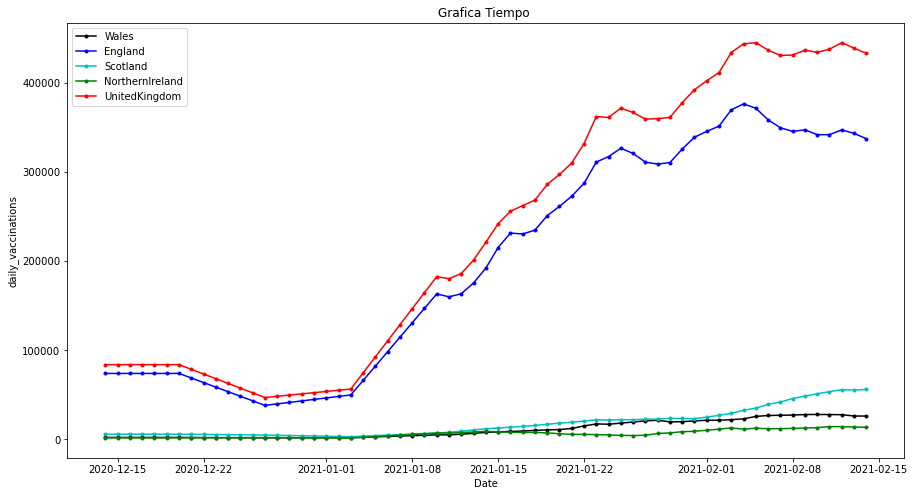

In [13]:
#Creamos un eje grande para su representacion
pl.figure(figsize=(15,8))
#Pintamos una linea para cada pais
pl.plot(var_x,y_wales,'k',label='Wales',marker='.')
pl.plot(var_x,y_England,'b',label='England',marker='.')
pl.plot(var_x,y_Scotland,'c',label='Scotland',marker='.')
pl.plot(var_x,y_NorthernIreland,'g',label='NorthernIreland',marker='.')
pl.plot(var_x,y_UnitedKingdom,'r',label='UnitedKingdom',marker='.')

#Label para los ejes x e y y titulo
pl.xlabel('Date')
pl.ylabel('daily_vaccinations')
pl.title('Grafica Tiempo ')
pl.legend()
pl.show()


Hemos utilizado un diagrama de lineas.
Hemos optado por un diagrama de lineas dado que pensamos que se trata de la mejor forma de valorar la consistencia de cada pais a lo largo del tiempo.

Teniendo en cuenta que el mejor plan de vacunación es el que se mantiene mas constante podemos afirmar segun el diagrama que Irlanda del norte se trata del pais que tiene la mayor consistencia a lo largo del tiempo dado que la linea que lo representa apenas tiene pendiente.


In [14]:
#Representacion de las vacuanciones diarias a lo largo de los años de Irlanda del norte
#Hemos representado de 3 en 3 años para que se muestre la progresion
ireland=daily.loc[daily['country']=='Northern Ireland'].daily_vaccinations
ireland=ireland[::3]
ireland

2006     1778.0
2009     1778.0
2012     1778.0
2015     1931.0
2018     2084.0
2021     1972.0
2024     1726.0
2027     2360.0
2030     4751.0
2033     7143.0
2036     8332.0
2039     7964.0
2042     7306.0
2045     5664.0
2048     4525.0
2051     6665.0
2054     9152.0
2057    12866.0
2060    12028.0
2063    12801.0
2066    14327.0
Name: daily_vaccinations, dtype: float64